In [1]:
#inport panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read the csv file
df = pd.read_csv('datos-17001.csv',delimiter=';')

In [2]:
#print head
df.head()

,date,RefSt,Sensor_O3,Temp,RelHum
0,21/06/2017 7:00,15.0,36.3637,21.77,53.97
1,21/06/2017 7:30,15.0,34.8593,25.50,42.43
2,21/06/2017 8:00,19.0,37.3510,27.97,34.93
3,21/06/2017 8:30,26.0,43.6993,29.41,32.07
4,21/06/2017 9:00,34.0,53.9600,30.20,30.83


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.set_index('date', inplace=True)

dayGrup = df.groupby(df.index.time)
print('Number of days in the data: ', len(dayGrup))

plt.rcParams.update({'font.size': 15})




Number of days in the data:  48


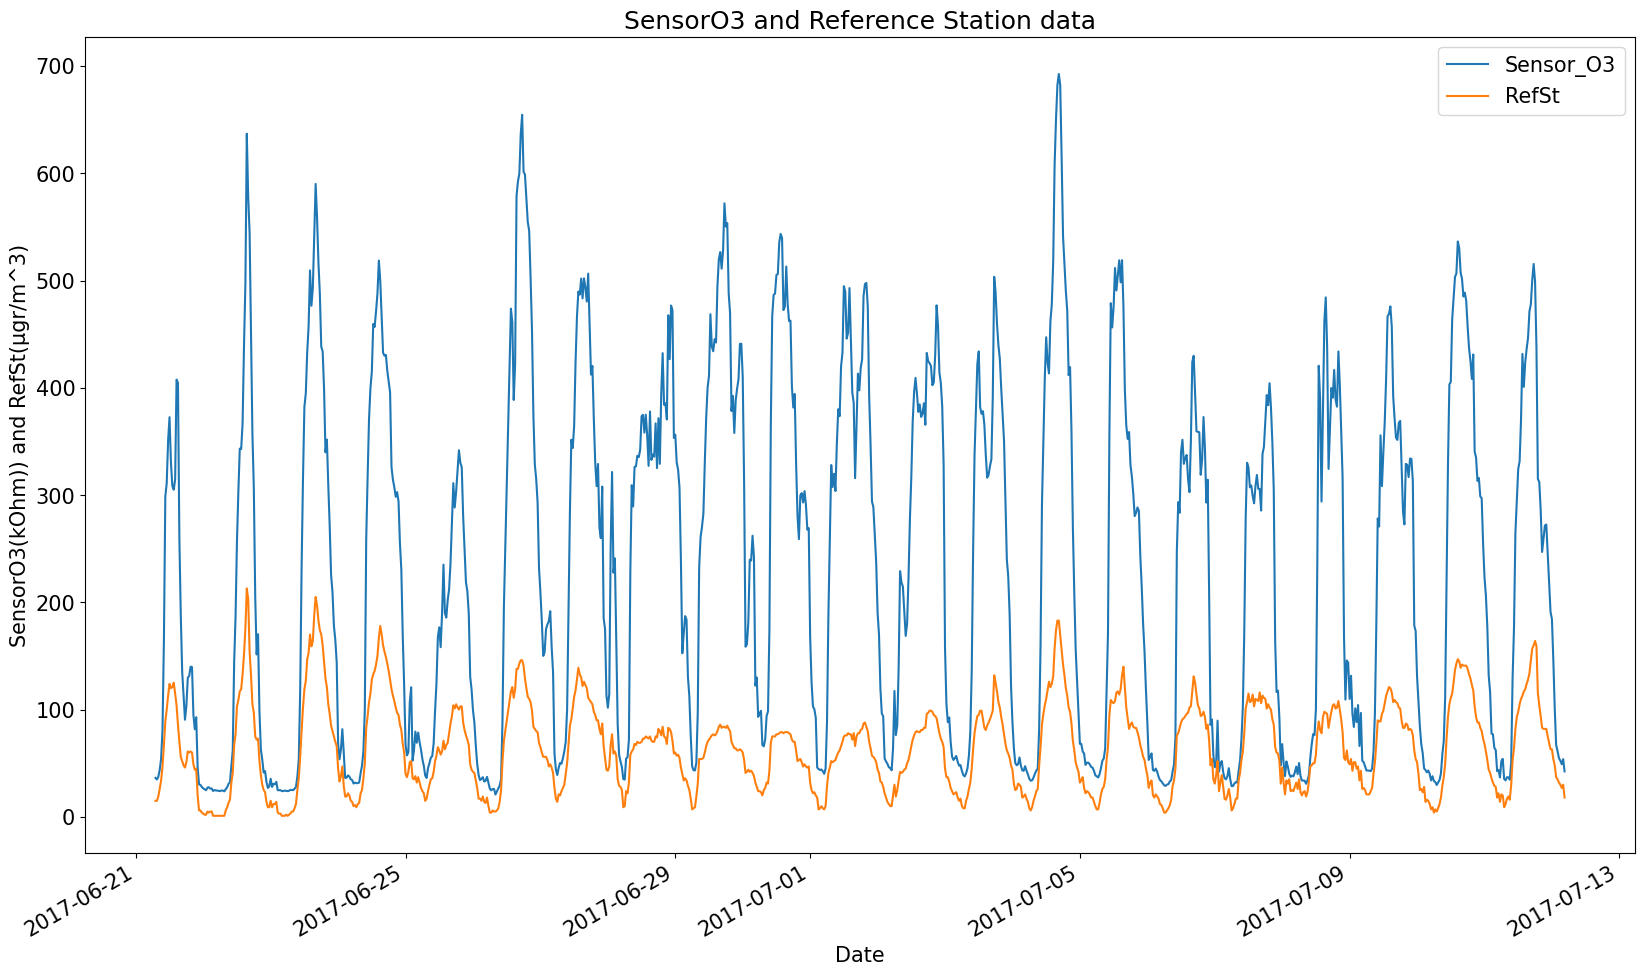

In [19]:
#plot the df data, as x axis the date and as y axis the Sensoro3
df['Sensor_O3'].plot()
df['RefSt'].plot()
plt.ylabel('SensorO3(kOhm)) and RefSt(µgr/m^3)')
plt.xlabel('Date')
plt.title('SensorO3 and Reference Station data')
plt.legend()

plt.show()


plt.rcParams["figure.figsize"] = (20,12)





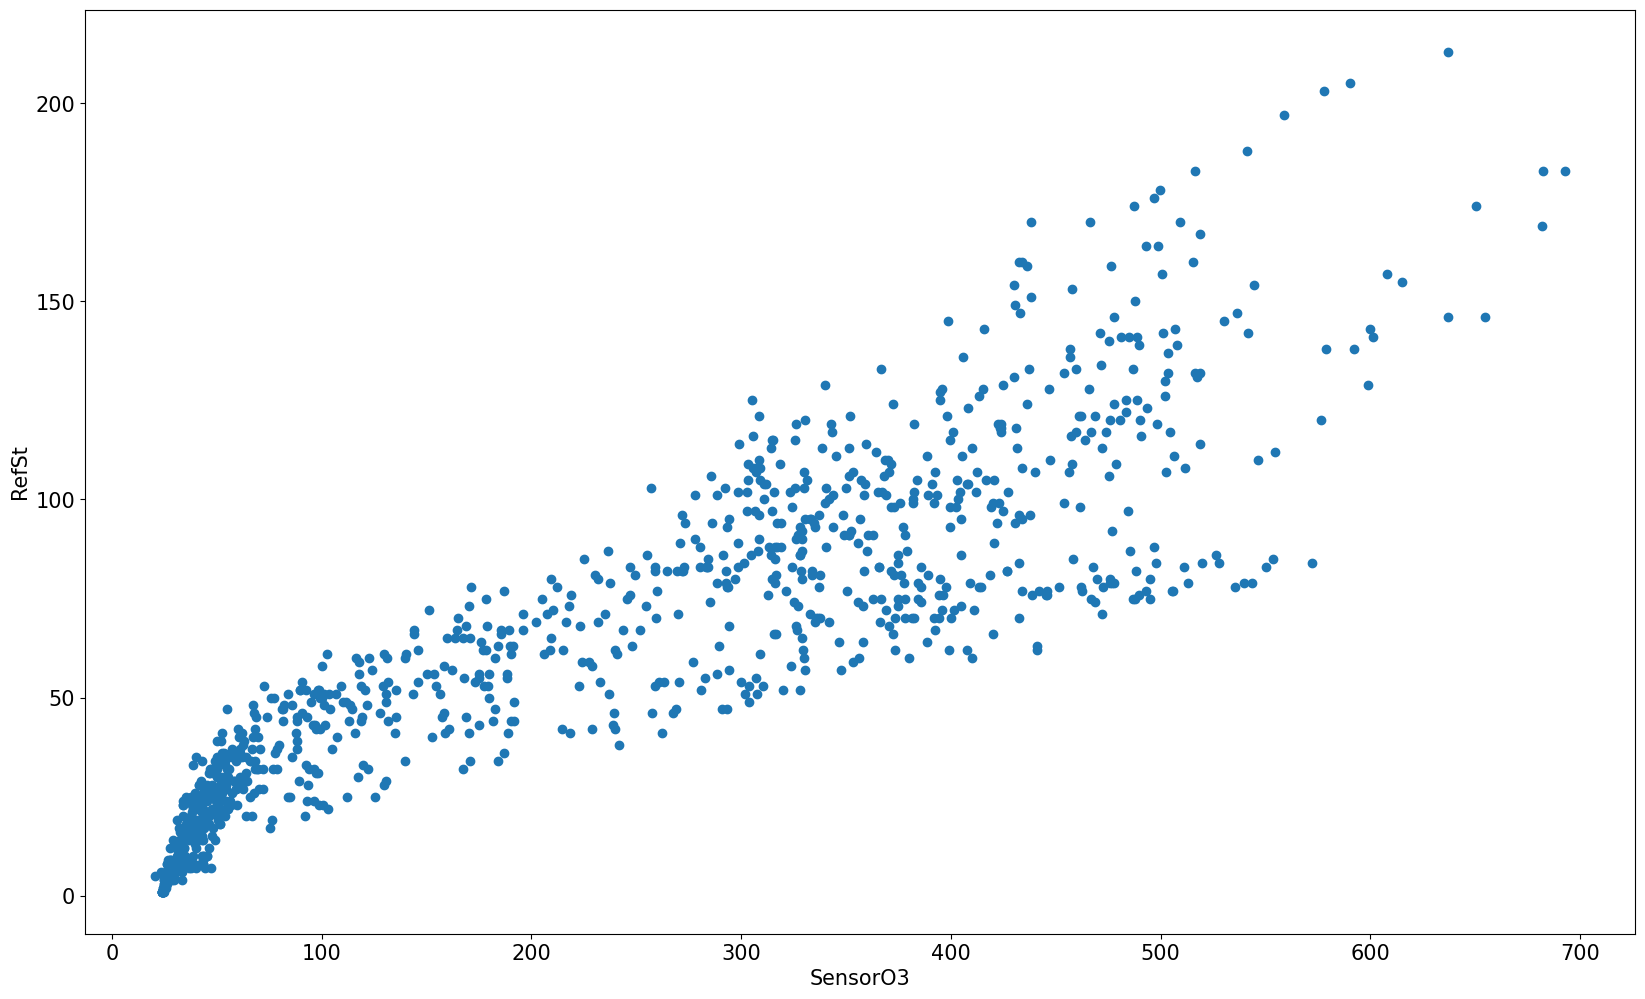

In [5]:
#, plot a scatter-plot, the x-axes corresponds to the ozone sensor data and the y-axes to the reference data
plt.scatter(df['Sensor_O3'], df['RefSt'])
plt.xlabel('SensorO3')
plt.ylabel('RefSt')
plt.show()


µsensor =  234.8399927
σsensor =  172.06496618340148
mean =  0
1.0


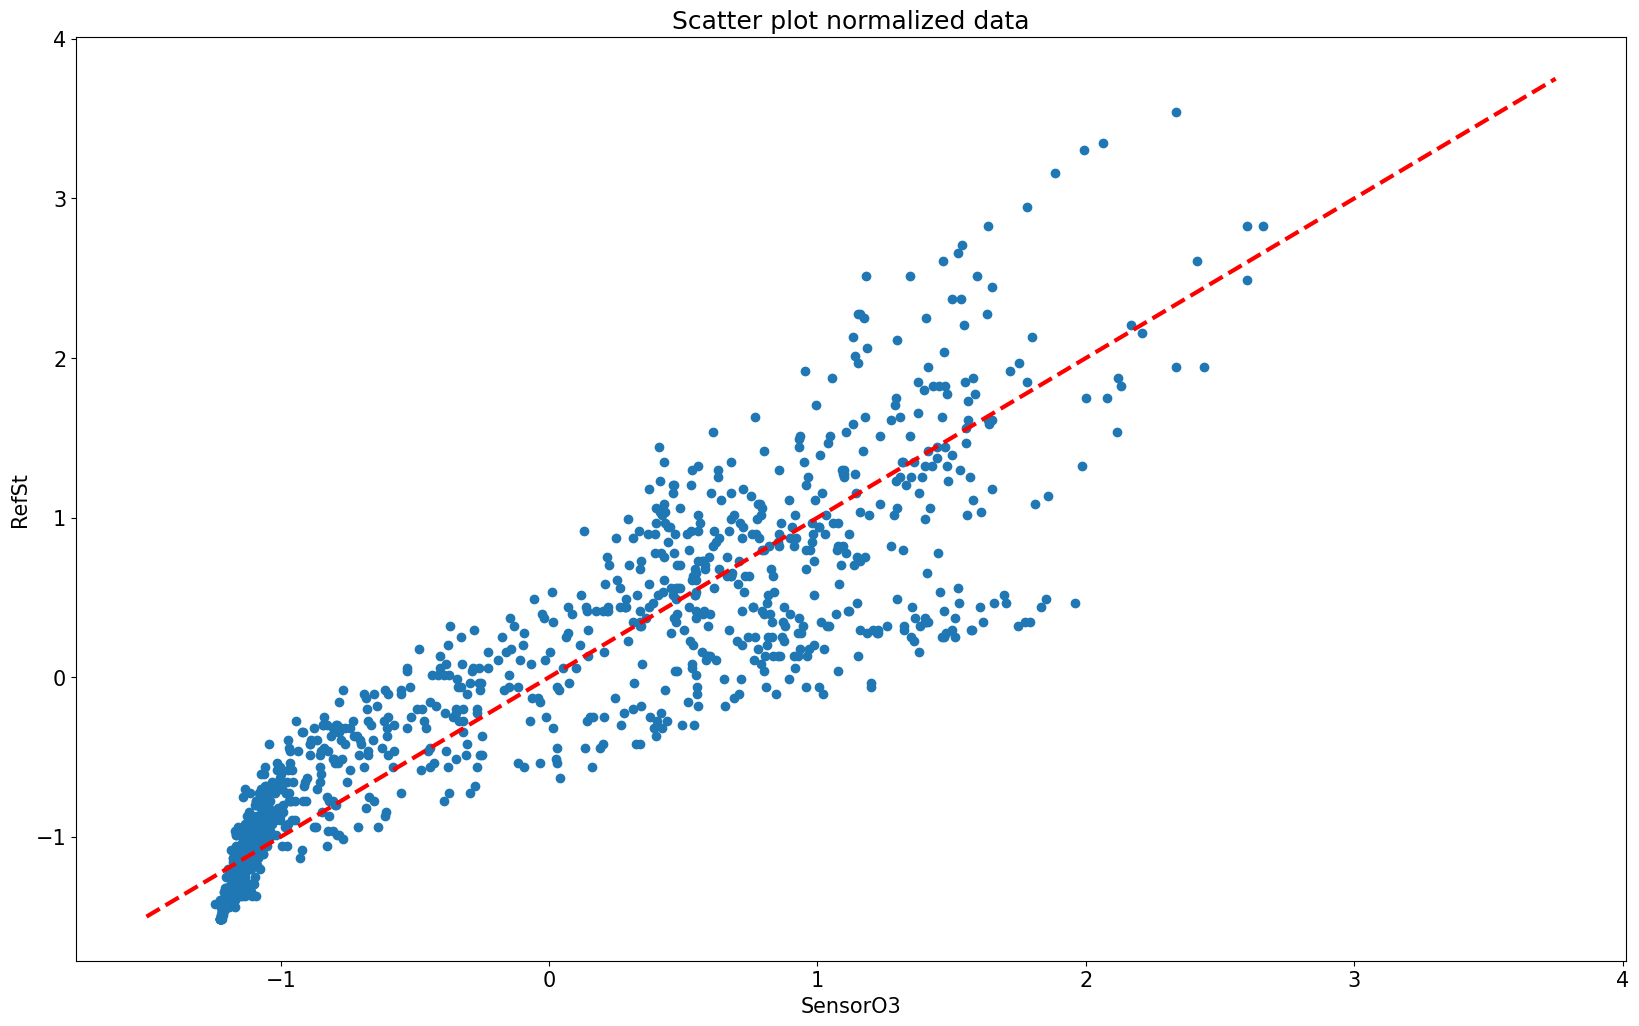

In [21]:
#Obtain the mean of the training set, µsensor
meand_sensor = df['Sensor_O3'].mean()
print('µsensor = ', meand_sensor)

#Obtain the standard deviation (std) of the training set, σsensor
sigma_sensor = df['Sensor_O3'].std()
print('σsensor = ', sigma_sensor)

#create normalize function
def normalize(x):
    mean = x.mean()
    std = x.std()
    return (x - mean) / std



normalized_sensor_O3 = normalize(df['Sensor_O3'])
normalized_refSt = normalize(df['RefSt'])
normalized_temp = normalize(df['Temp'])
normalized_relHum = normalize(df['RelHum'])

print ("mean = ", round(normalized_sensor_O3.mean()))
print (normalized_sensor_O3.std())
#plot the normalized data


plt.scatter(normalized_sensor_O3, normalized_refSt)
#plot the line of 45 degrees
plt.plot([-1.5,  3.75], [-1.5, 3.75], color='red', linewidth=3, linestyle='--')
plt.title('Scatter plot normalized data')
plt.xlabel('SensorO3')
plt.ylabel('RefSt')
plt.show()



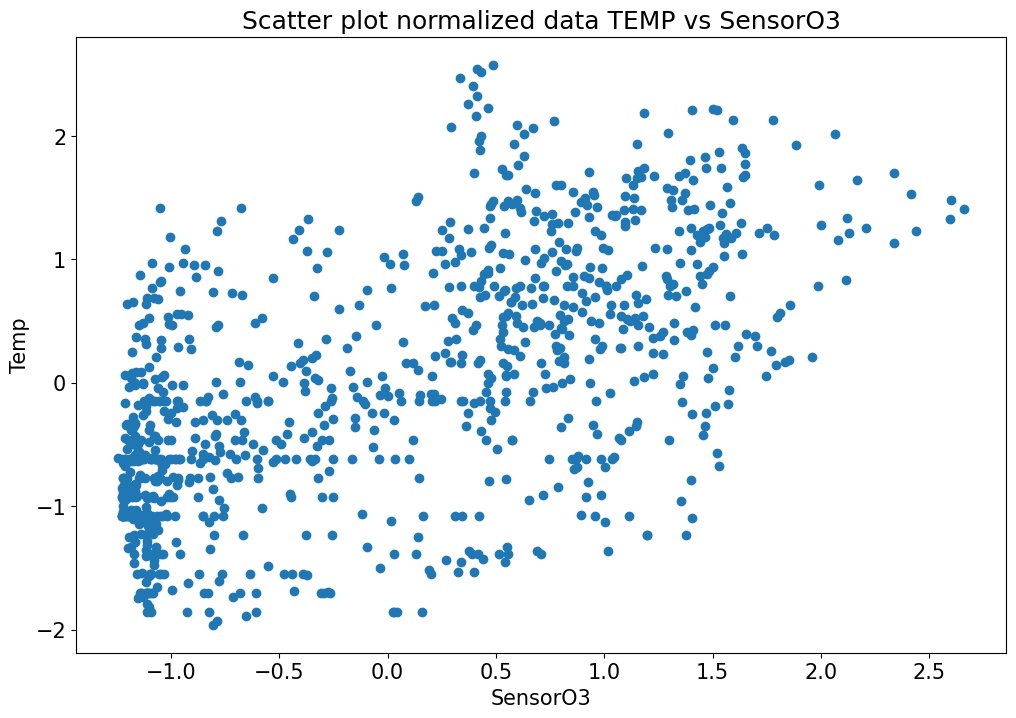

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(normalized_sensor_O3, normalized_temp)
plt.title('Scatter plot normalized data TEMP vs SensorO3')
plt.xlabel('SensorO3')
plt.ylabel('Temp')
plt.show()

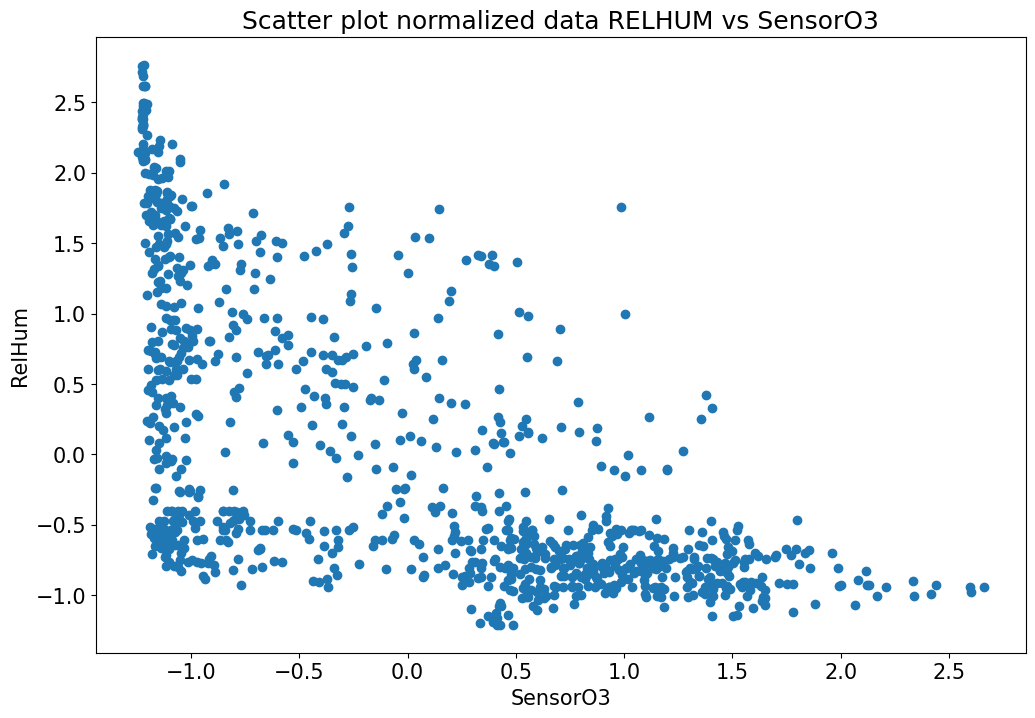

In [26]:
plt.scatter(normalized_sensor_O3, normalized_relHum)
plt.title('Scatter plot normalized data RELHUM vs SensorO3')
plt.xlabel('SensorO3')
plt.ylabel('RelHum')

plt.show()

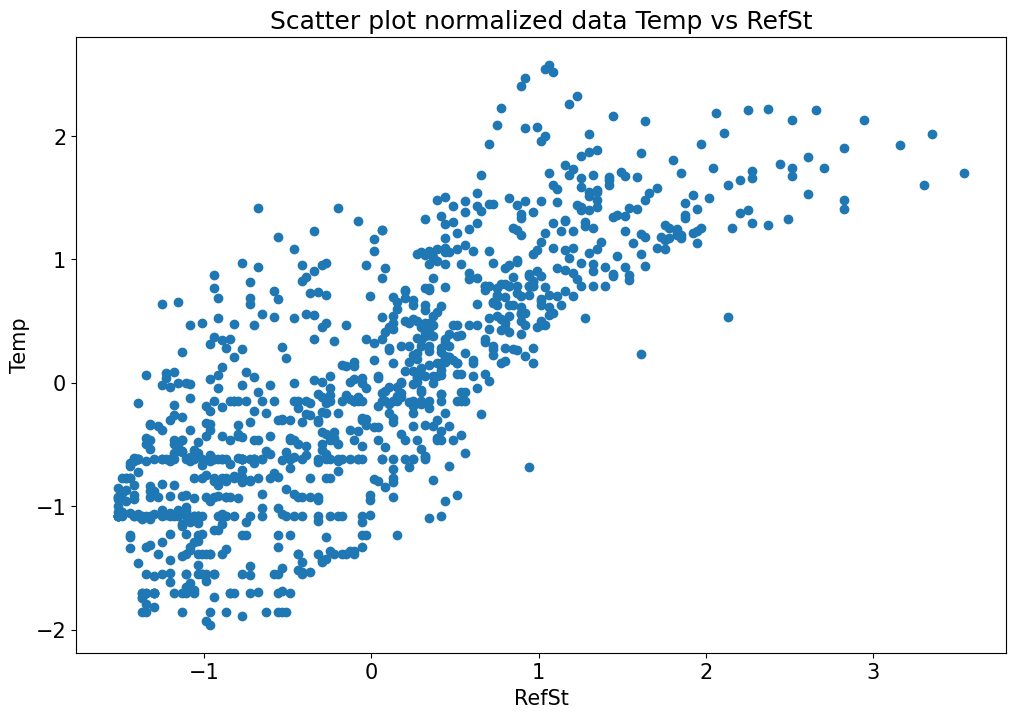

In [27]:
plt.scatter(normalized_refSt, normalized_temp)
plt.title('Scatter plot normalized data Temp vs RefSt')
plt.xlabel('RefSt')
plt.ylabel('Temp')
plt.show()

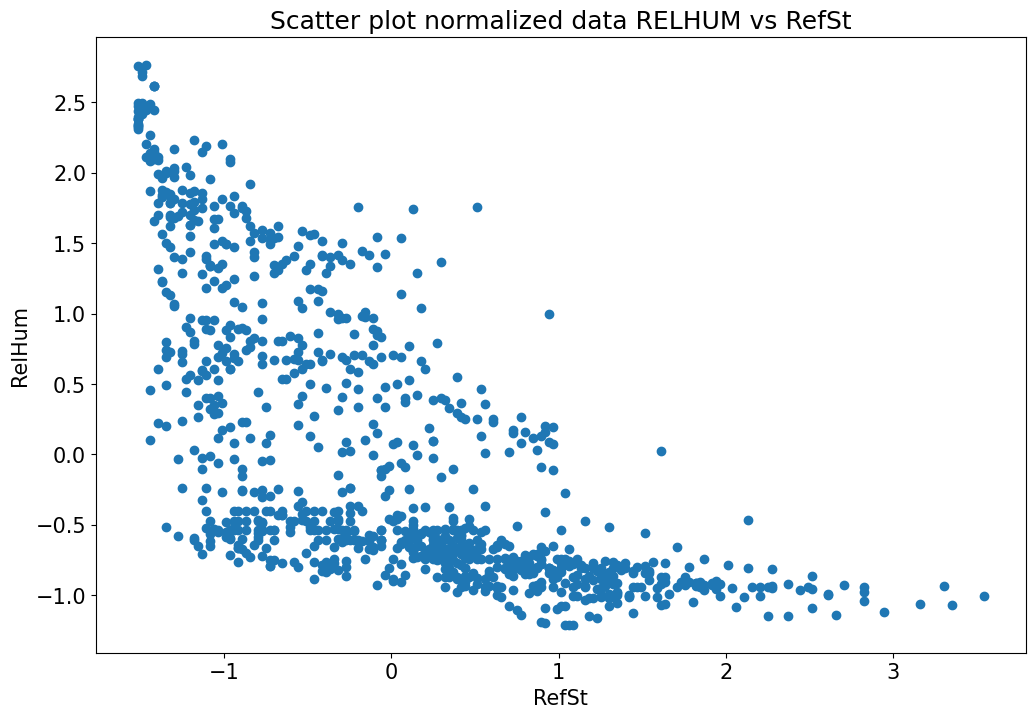

In [28]:
plt.scatter(normalized_refSt, normalized_relHum)
plt.title('Scatter plot normalized data RELHUM vs RefSt')
plt.xlabel('RefSt')
plt.ylabel('RelHum')
plt.show()

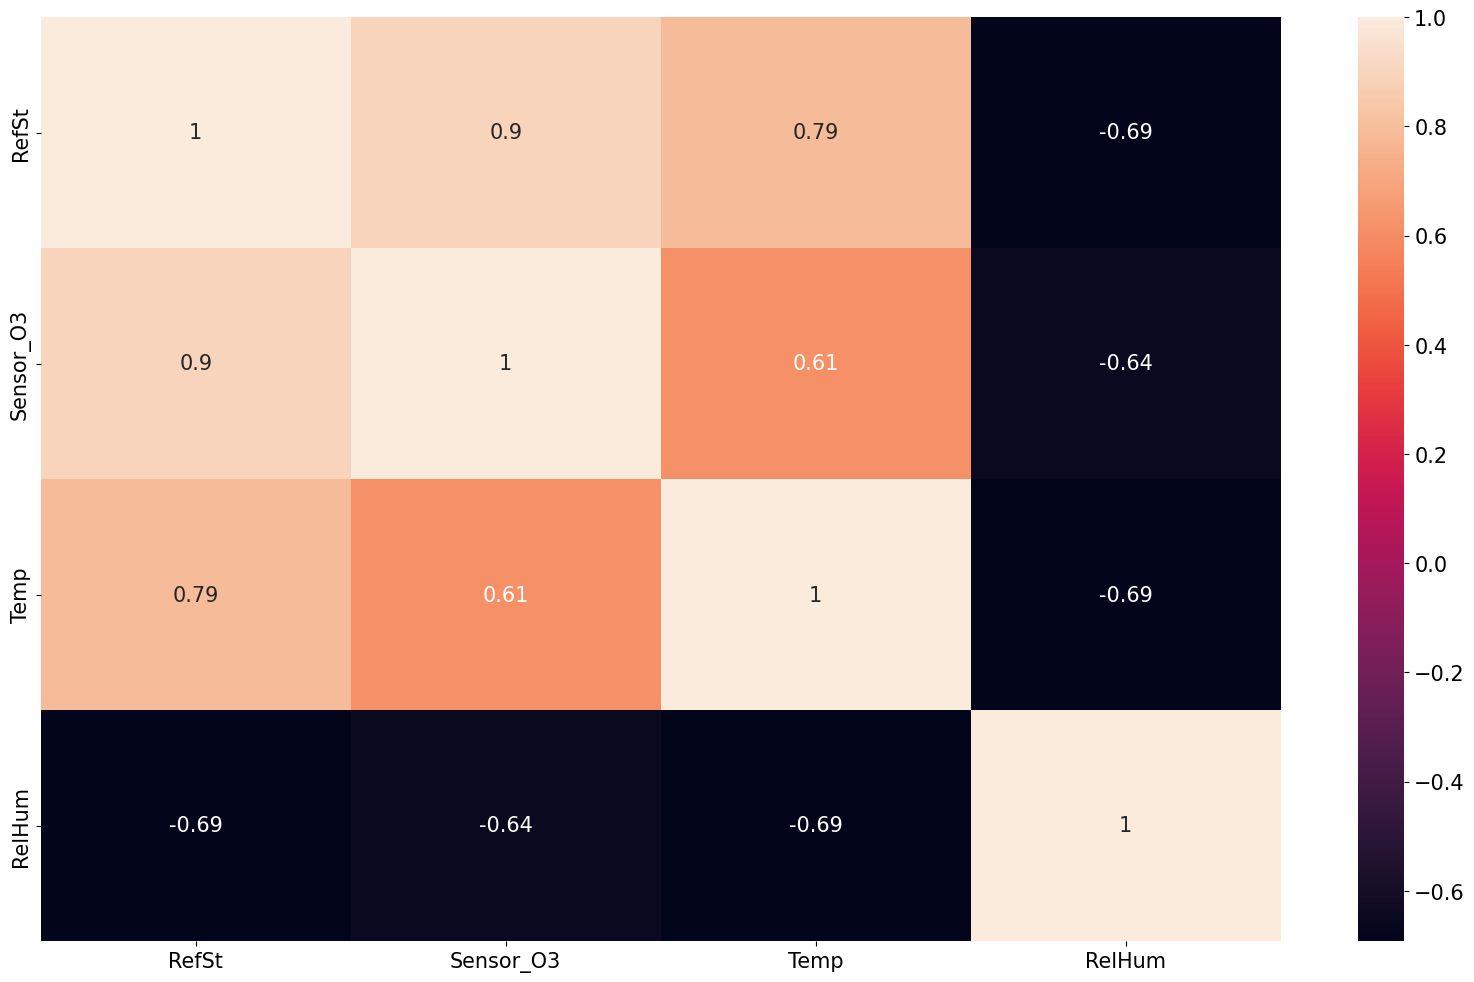

In [22]:
#plot the correlation matrix
df.corr()
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()


In [11]:
#chek if there is any NaN value
df.isnull().sum()

RefSt        0
Sensor_O3    0
Temp         0
RelHum       0
dtype: int64

In [12]:
#define X and Y sets
X = df[['Sensor_O3','Temp','RelHum']]
Y = df['RefSt']

#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

print(X_train,Y_train)


                     Sensor_O3   Temp  RelHum
date                                         
2017-07-02 15:30:00   372.8670  31.30   29.03
2017-06-30 13:00:00   535.5467  25.30   32.00
2017-07-01 10:00:00   380.0287  25.17   32.23
2017-06-30 04:00:00   241.9060  13.00   52.00
2017-07-07 14:00:00   292.3563  40.87   24.13
...                        ...    ...     ...
2017-06-23 12:00:00   382.2070  34.93   29.60
2017-06-27 00:00:00   209.2587  22.63   43.13
2017-07-09 07:00:00    43.0047  18.03   43.77
2017-06-30 10:30:00   466.8127  24.90   32.43
2017-06-23 10:00:00    53.5990  34.07   35.60

[700 rows x 3 columns] date
2017-07-02 15:30:00     81.0
2017-06-30 13:00:00     78.0
2017-07-01 10:00:00     60.0
2017-06-30 04:00:00     38.0
2017-07-07 14:00:00    103.0
                       ...  
2017-06-23 12:00:00    119.0
2017-06-27 00:00:00     65.0
2017-07-09 07:00:00     21.0
2017-06-30 10:30:00     75.0
2017-06-23 10:00:00     36.0
Name: RefSt, Length: 700, dtype: float64


-32.345461575088734 [ 0.15574604  2.49777295 -0.05333874]


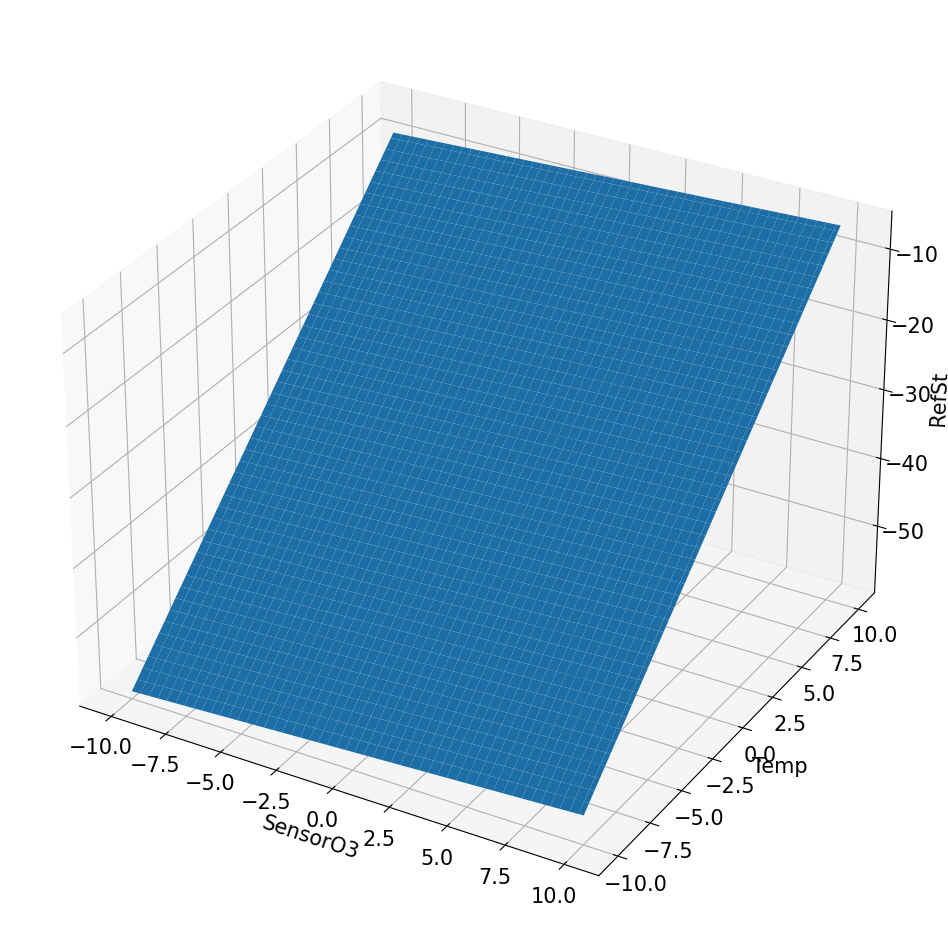

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.intercept_,lm.coef_)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definisci i coefficienti
A = lm.coef_[0]
B = lm.coef_[1]
C = lm.coef_[2]
Q = lm.intercept_

# Crea un array di valori per x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Crea una griglia di coordinate
X, Y = np.meshgrid(x, y)

# Calcola Z in base alla funzione
Z = A*X + B*Y + Q

# Crea il plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
#add title of the axis
ax.set_xlabel('SensorO3')
ax.set_ylabel('Temp')
ax.set_zlabel('RefSt')


# Mostra il plot
plt.show()



In [14]:
from sklearn.metrics import mean_squared_error

train_predictions = lm.predict(X_train)
train_rmse = mean_squared_error(Y_train, train_predictions, squared=False)
print('Train RMSE: ', train_rmse)

Train RMSE:  13.754815341196275


In [15]:
test_predictions = lm.predict(X_test)
test_rmse = mean_squared_error(Y_test, test_predictions, squared=False)
print('Test RMSE: ', test_rmse)

Test RMSE:  13.009761859981646


In [16]:
#calcualte the R2
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, train_predictions)
print('R2 training: ', r2)
#calcualte the R2
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, test_predictions)
print('R2 test: ', r2)

R2 training:  0.8907681244018592
R2 test:  0.9068814291209157


In [17]:
import matplotlib.pyplot as plt
data_predict = lm.predict(X)
list = []
for i in range(0,len(data_predict)):
    list.append(data_predict[i])


plt.plot(list)
plt.plot(data_predict)
plt.show()

print("mean squerd =",mean_squared_error(list, data_predict, squared=False))


c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 100 features, but LinearRegression is expecting 3 features as input.

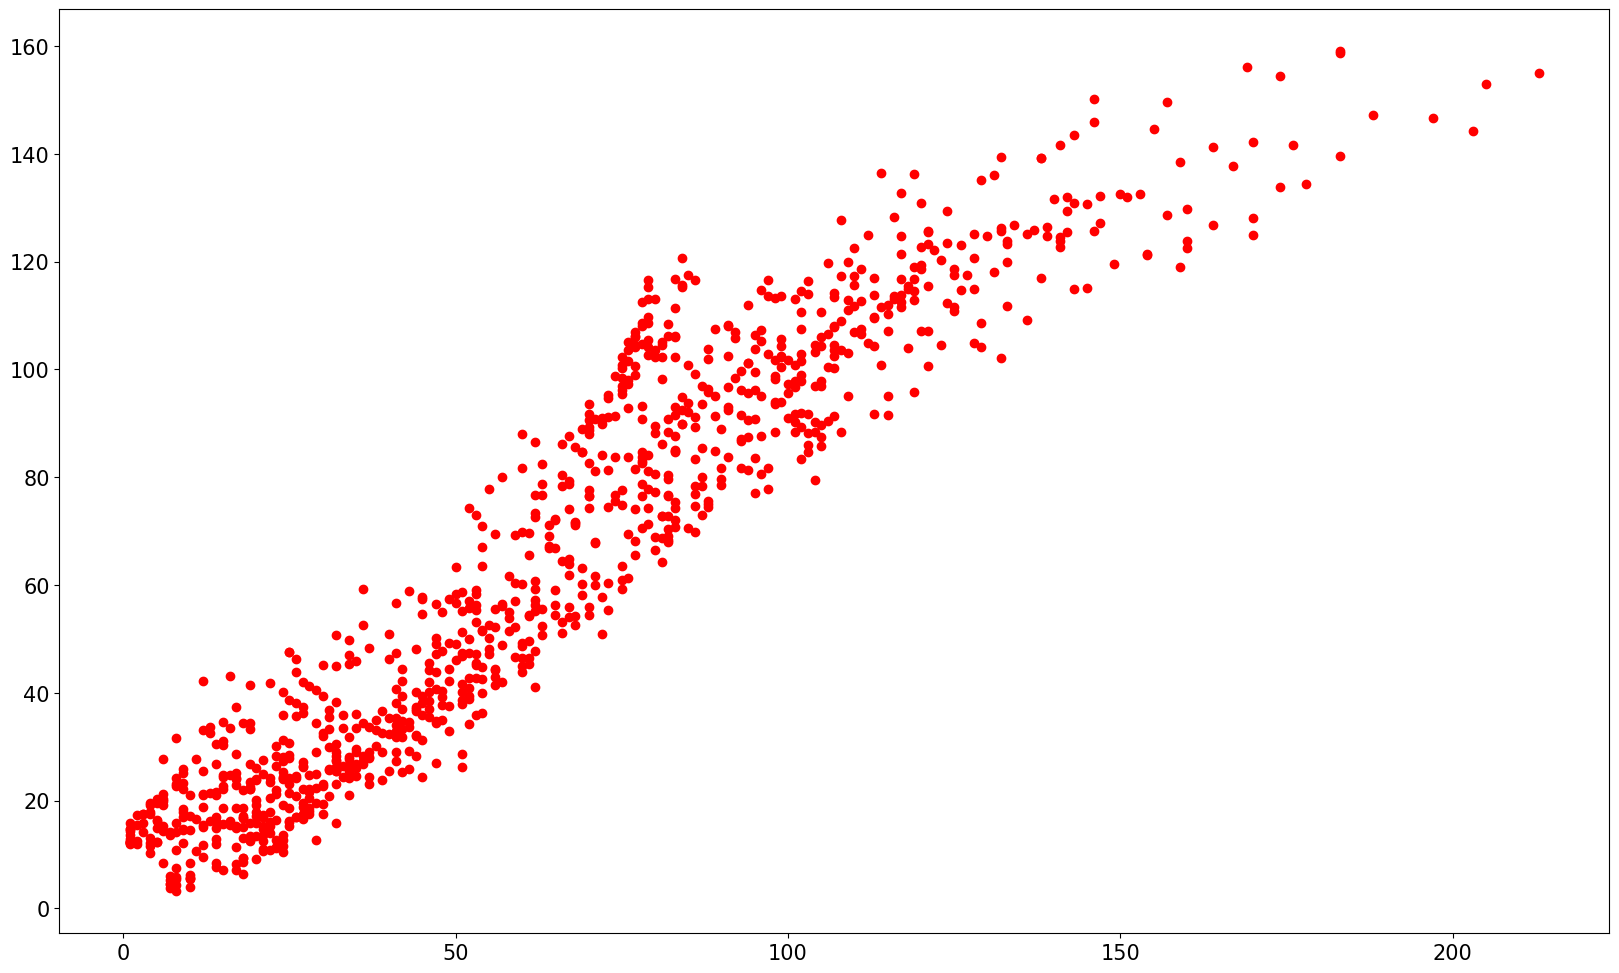

In [ ]:
plt.scatter(Y, data_predict, color='red')
